<a href="https://colab.research.google.com/github/kronze1996/Taxi-trip-time-Prediction/blob/main/Kartikey_Sharma_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis

Let's first import all the libraries we will need and fetch the data.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the dataset.

In [ ]:
path = "/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Good thing we don't have null values

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.shape

(1458644, 11)

Dropping duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)

Checking the passenger_count and number of times a taxi had that particular number of passengers.

In [ ]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Checking for taxi which had zero passengers

In [ ]:
df[df['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8
278290,id0796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9
301600,id2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072
303133,id0414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15
337809,id0271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41
375972,id3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15


As we know we donot require the data of taxi that has zero passengers so let's drop them.

In [ ]:
df=df[df['passenger_count']!=0]

In [ ]:
df['vendor_id'].value_counts()

2    780273
1    678311
Name: vendor_id, dtype: int64

Checking data type of datetime column.

In [ ]:
df["pickup_datetime"][0]

'2016-03-14 17:24:55'

Converting it from string to date time

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1338026   2016-04-08 13:31:04
1338027   2016-01-10 07:35:15
1338028   2016-04-22 06:57:41
1338029   2016-01-05 15:56:26
1338030   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1338031, dtype: datetime64[ns]

In [ ]:
df['dropoff_datetime']

0         2016-03-14 17:32:30
1         2016-06-12 00:54:38
2         2016-01-19 12:10:48
3         2016-04-06 19:39:40
4         2016-03-26 13:38:10
                  ...        
1338026   2016-04-08 13:44:02
1338027   2016-01-10 07:46:10
1338028   2016-04-22 07:10:25
1338029   2016-01-05 16:02:39
1338030   2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1338031, dtype: datetime64[ns]

Let's plot the boxplot graph and do some outlier detection

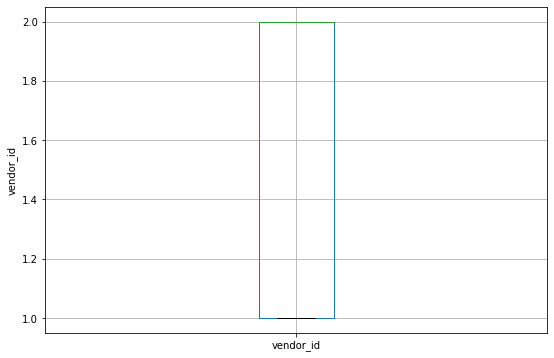

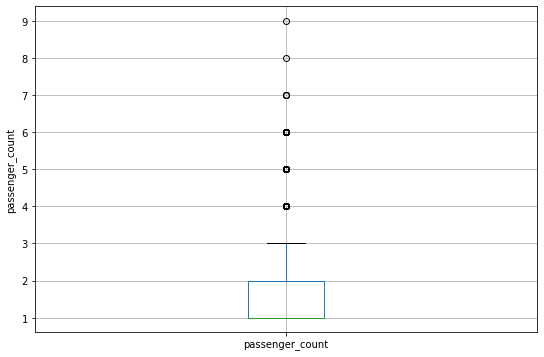

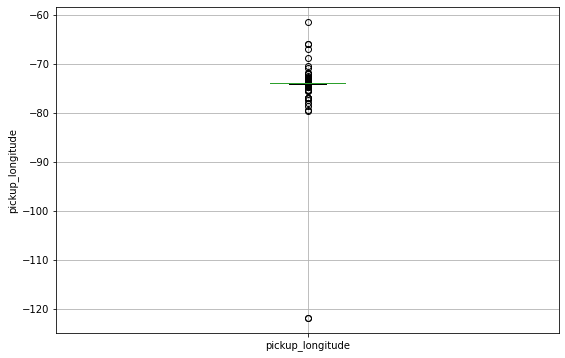

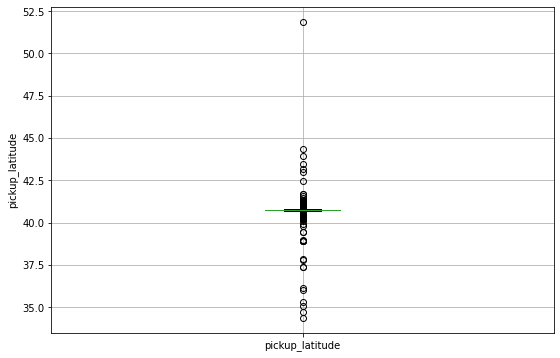

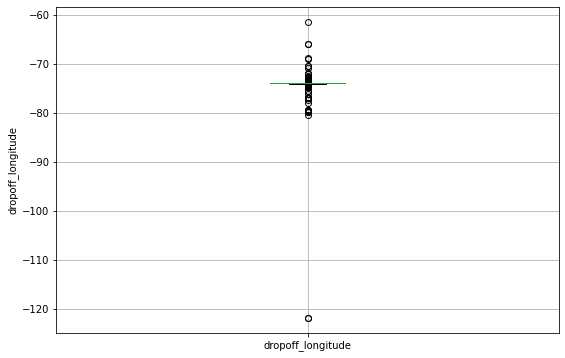

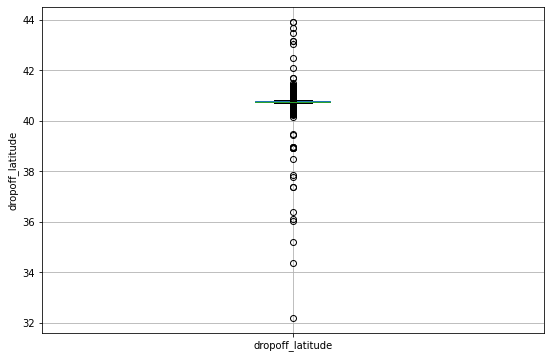

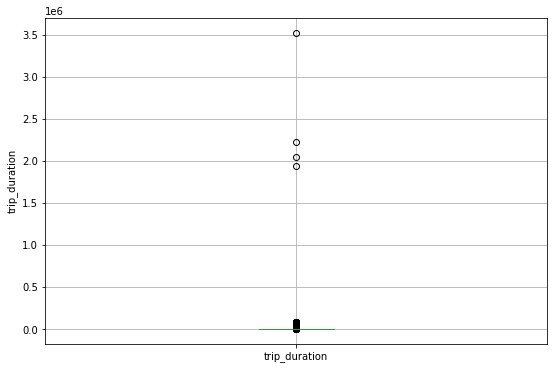

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

Here we can see alot of outliers now let's just drop the outliers and then see the shape of our data

In [ ]:
#In this case, we consider outliers as rows that have at least two outlied numerical values.
#The optimal value for this parameter can be later determined through the cross-validation 
from collections import Counter
n = 1
indexes = [] 
 
for col in df.describe().columns: 
    Q1 = np.percentile(df[col], 25) 
    Q3 = np.percentile(df[col],75) 
    IQR = Q3 - Q1 
 
    limit = 1.5 * IQR 
 
    list_outliers = df[(df[col] < Q1 - limit) | (df[col] > Q3 + limit )].index # Determine a list of indices of outliers for feature col 
 
    indexes.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices 
 
indexes = Counter(indexes) 
multiple_outliers = list( k for k, v in indexes.items() if v > n )

In [ ]:
df.drop(multiple_outliers, axis = 0) 
df = df.drop(multiple_outliers, axis = 0).reset_index(drop=True)

Plotting box plot for outlier check

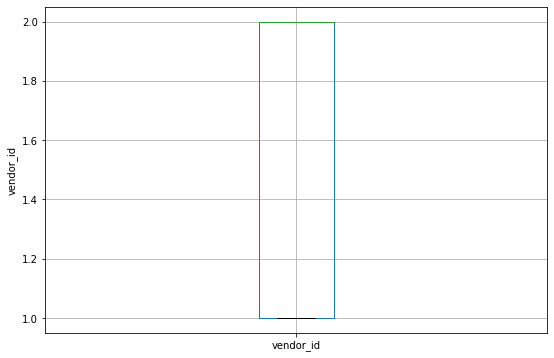

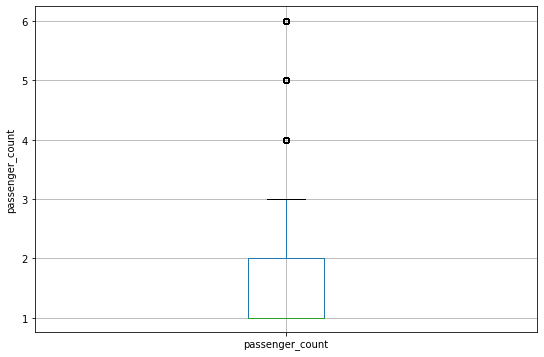

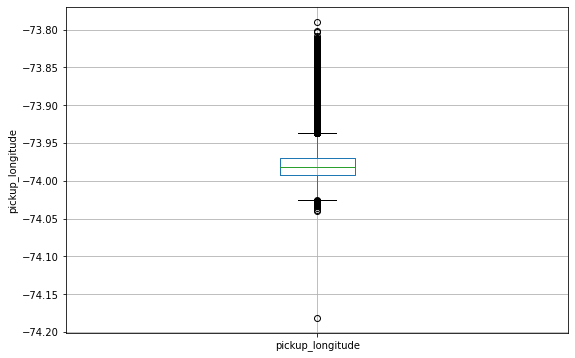

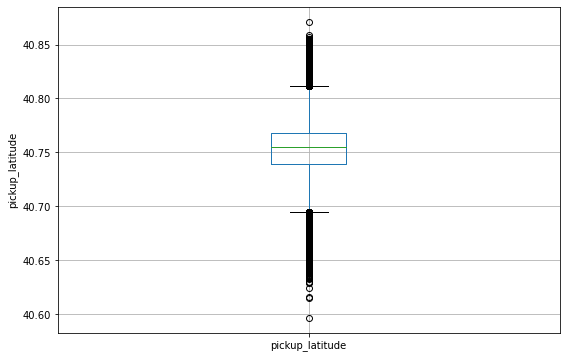

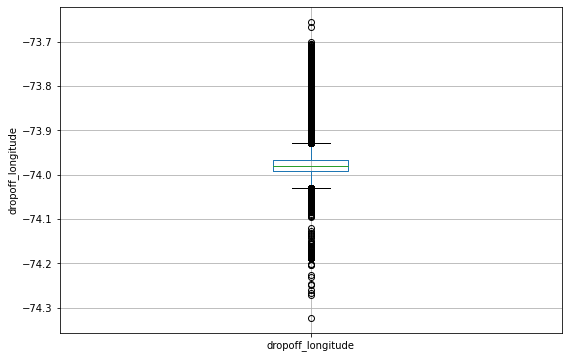

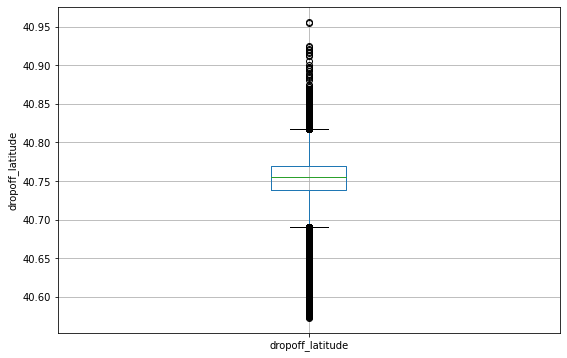

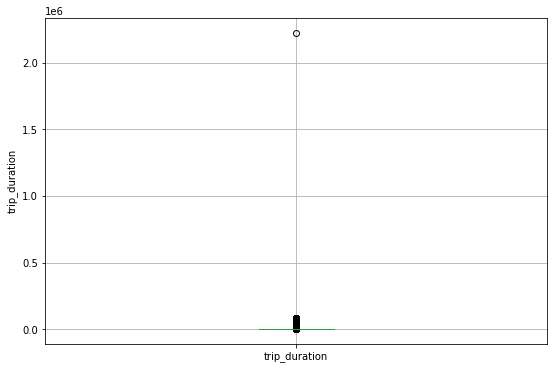

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1338031, 11)

*Okay, so the data looks fine for now let's explore it more and make some conclusions.*

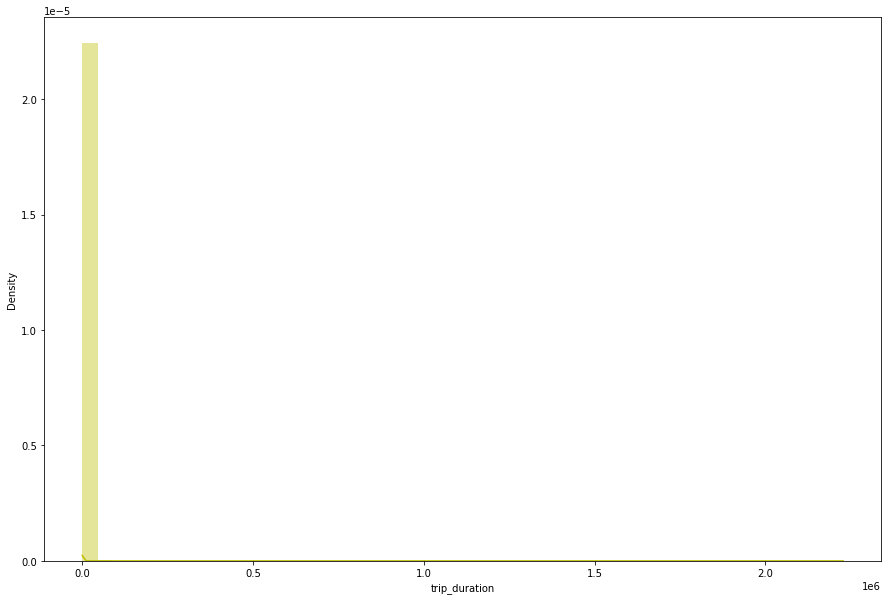

In [ ]:
# Dependent variable 'Response'
plt.figure(figsize=(15,10))
sns.distplot(df['trip_duration'],color="y")

As we can see skewness in our data we can let's try to do log transform to normalize our data

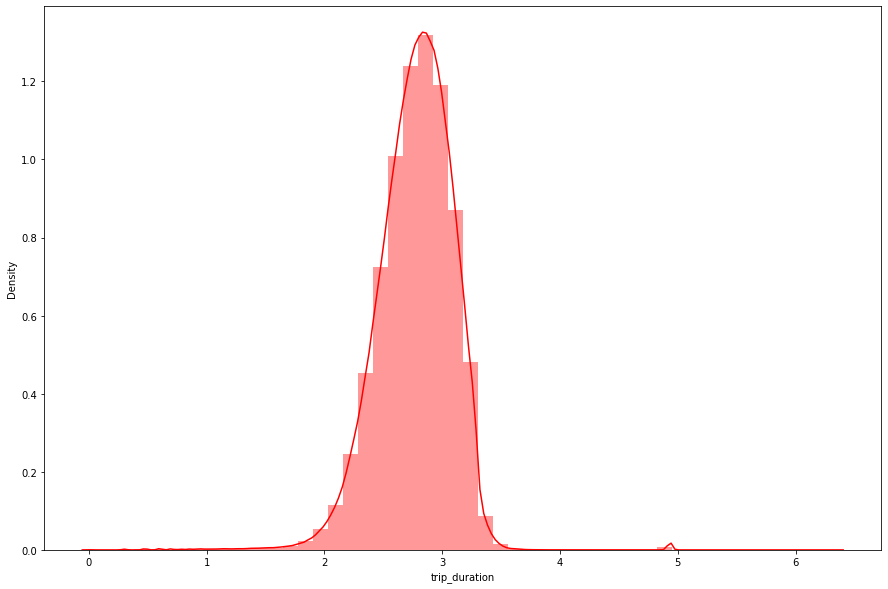

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['trip_duration']),color="R")

In [ ]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.280877,0.003937,0.010307,-0.004226,0.008379,0.022201
passenger_count,0.280877,1.000000,-0.028531,-0.002955,-0.032522,0.002470,-0.009885
pickup_longitude,0.003937,-0.028531,1.000000,0.593674,0.295058,0.278415,0.000415
pickup_latitude,0.010307,-0.002955,0.593674,1.000000,0.260149,0.513638,-0.012838
dropoff_longitude,-0.004226,-0.032522,0.295058,0.260149,1.000000,0.483399,0.009073
dropoff_latitude,0.008379,0.002470,0.278415,0.513638,0.483399,1.000000,-0.016744
trip_duration,0.022201,-0.009885,0.000415,-0.012838,0.009073,-0.016744,1.000000


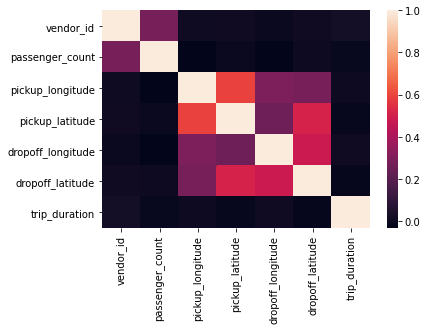

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,vendor_id,1.129889e+01
1,passenger_count,2.863049e+00
2,pickup_longitude,1.059116e+07
3,pickup_latitude,4.669280e+06
4,dropoff_longitude,1.095591e+07
5,dropoff_latitude,3.713038e+06
6,trip_duration,1.061767e+00


Plotting all the numerical features with respect to trip duration to check linear regression between our dependent and independent variables

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

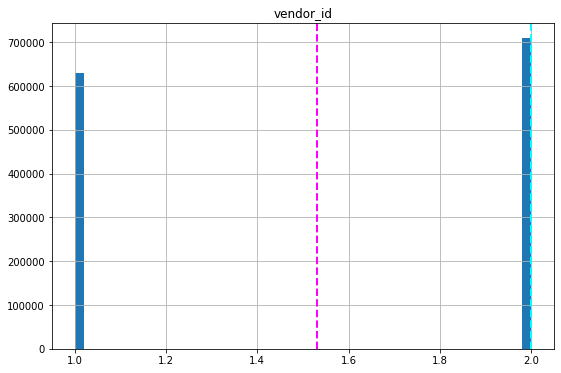

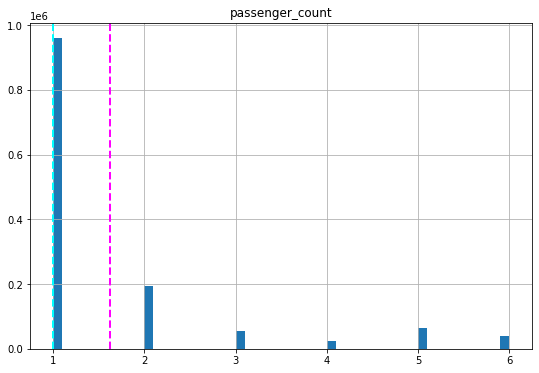

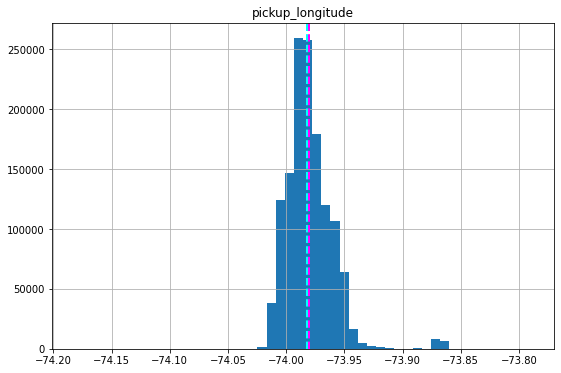

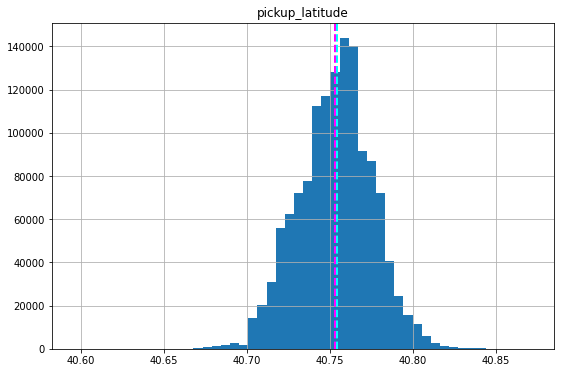

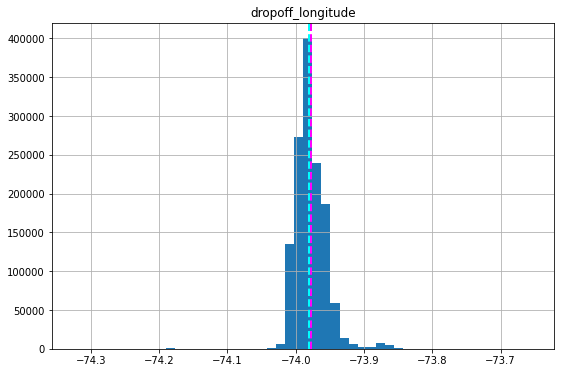

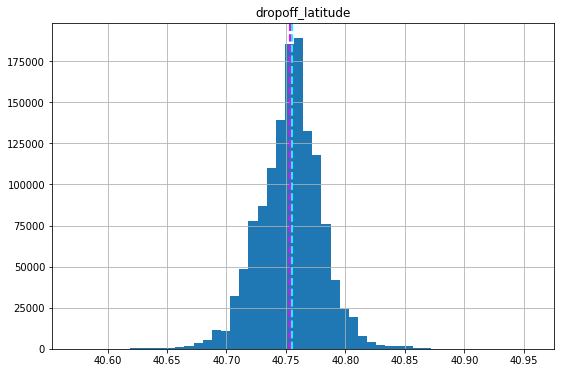

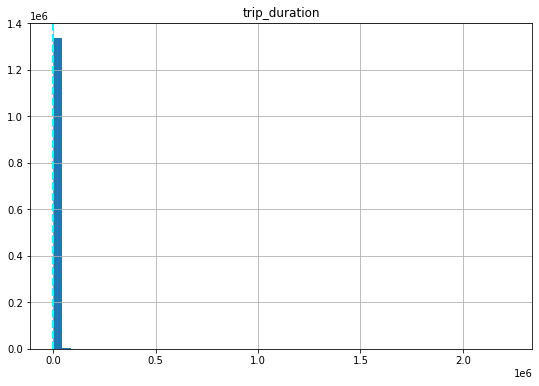

In [ ]:
# plot a bar plot for each categorical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

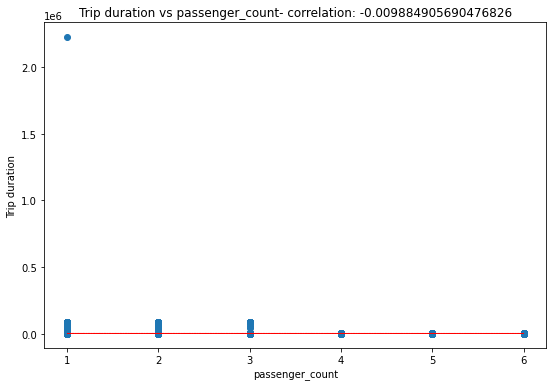

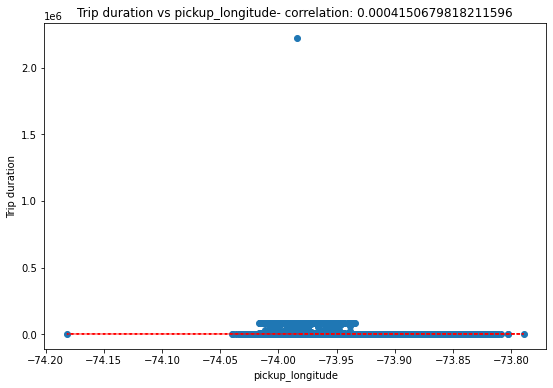

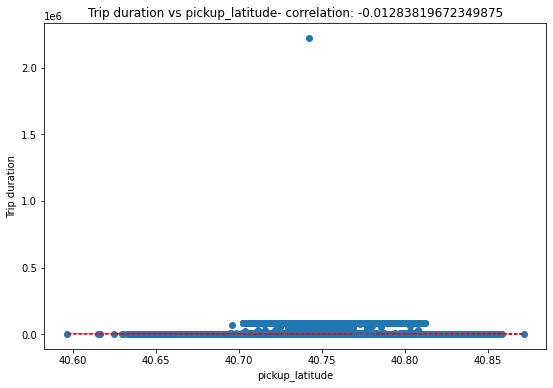

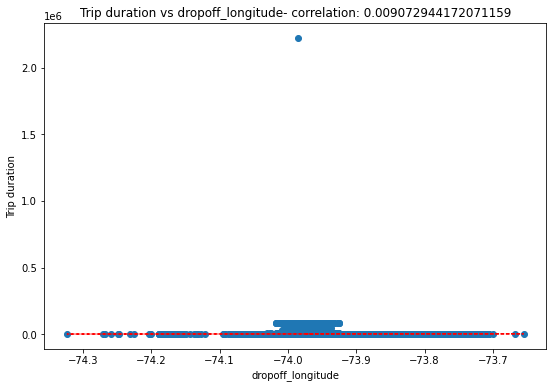

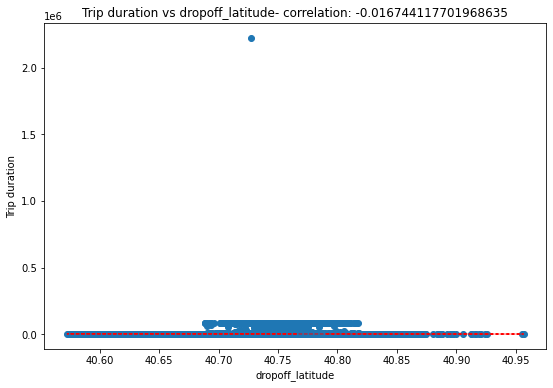

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

After looking how these independent variables are dependent on our dependent variable, we will do some feature engineering to build some more sensible features and make some prediction on our data.


##Feature engineering

So for our feature engineering task we will first need a variable that will give us the day of that particular pickup date

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Now that we have gotten the day let's see how it looks like

In [ ]:
df['pickup_day'].value_counts()

Saturday     205127
Friday       204741
Thursday     199865
Wednesday    193320
Tuesday      186571
Sunday       177842
Monday       170565
Name: pickup_day, dtype: int64

In [ ]:
df["dropoff_day"].value_counts()

Saturday     205041
Friday       204286
Thursday     199241
Wednesday    193023
Tuesday      186339
Sunday       179558
Monday       170543
Name: dropoff_day, dtype: int64

Plotting the number of pickups on each day for better visualization

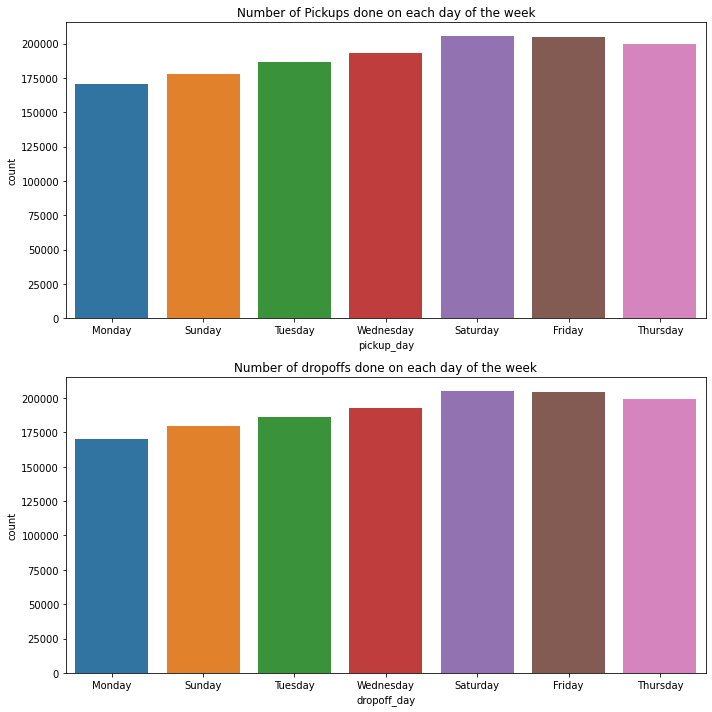

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

We can also divide our time into morning, midday, evening and late night for calculating the taxi booked more at what time.

In [ ]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

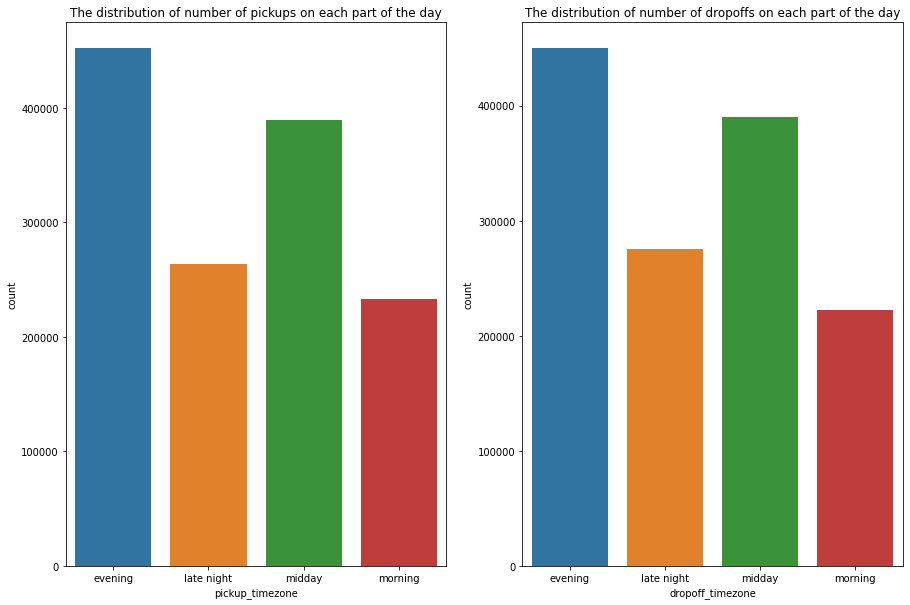

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

df=df[df['passenger_count']!=0]tude and longitude given to us from the dataset.


In [ ]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [ ]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,evening,evening,0.931401
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,late night,late night,1.122207
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,midday,midday,3.968637
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,evening,evening,0.923307
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,midday,midday,0.738763


Checking for number of rows with distance zero

In [ ]:
len(df[df.distance==0])

4121

Now dropping these useless data from the dataframe

Here we can see that our taxi were most booked on the day of friday

In [63]:
df=df[df['distance']!=0]
df.shape

(1333910, 16)

Now let's try to plot the relationship of distance with our dependent variable "trip_duration"

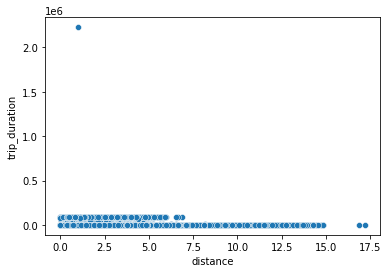

In [64]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

Now let's make a new feature named trip duration hour and speed from our distance and trip duration

In [66]:
df['trip_duration_hour']=df['trip_duration']/3600

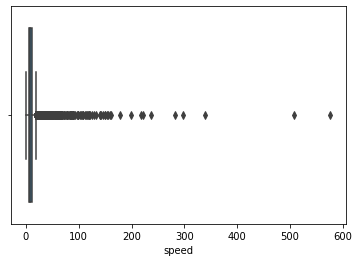

In [67]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

In [68]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone,distance,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,evening,evening,0.931401,0.126389,7.369324
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,late night,late night,1.122207,0.184167,6.093432
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,midday,midday,3.968637,0.590000,6.726504
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,evening,evening,0.923307,0.119167,7.748028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,midday,midday,0.738763,0.120833,6.113903


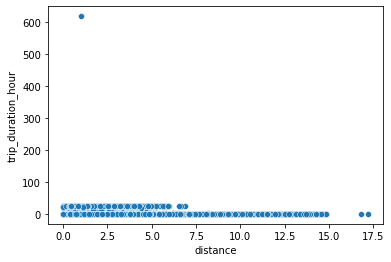

In [69]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

Now let's do some one hot encoding

We have converted the weeks and store_and_fwd_flag as one hot encoding variables and made them into 0 and 1 values

In [ ]:
# One hot encoding
df_new=df.copy()
df_new = pd.get_dummies(df_new, columns=["store_and_fwd_flag", "DayOfWeek"], prefix=["store_and_fwd_flag",'DayOfWeek'])

In [ ]:
df_new.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance(in km),store_and_fwd_flag_N,store_and_fwd_flag_Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498991,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.806074,1,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.387103,1,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485965,1,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188962,1,0,0,0,1,0,0,0,0


Now making a graph between the trip duration and the log distance so we get a graph between normalized data

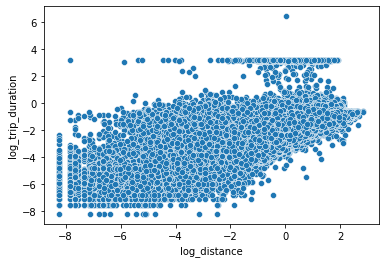

In [70]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

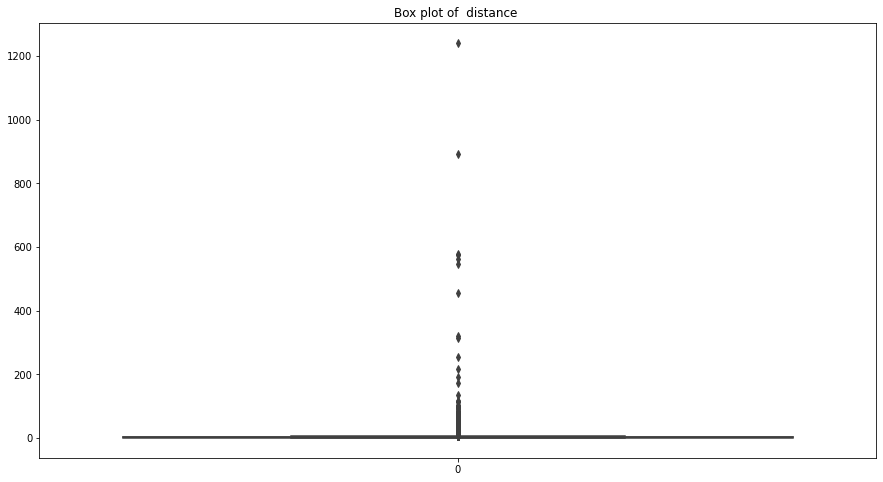

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df_new['Distance(in km)'], orient="v")

Let's see what was time taken to cover 1200 kms

In [ ]:
df_new[df_new['trip_duration']>86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance(in km),store_and_fwd_flag_N,store_and_fwd_flag_Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,1939736,20.154989,1,0,0,0,0,0,0,1,0
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,2049578,5.984365,1,0,0,0,1,0,0,0,0
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,2227612,1.635641,1,0,0,0,0,0,0,1,0
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,3526282,19.906909,1,0,0,0,1,0,0,0,0


In [ ]:
df_new[df_new['Distance(in km)']>1200]['trip_duration']

184925    792
Name: trip_duration, dtype: int64

We can see that it is not possible for a taxi to cover 1200 kms in 792 seconds unless it was made by humans from the future, neither 24hours are needed to travel 10 kms so we need to do a better way to remove outliers

In [ ]:
df=df[df['passenger_count']!=0]

In [ ]:
df_new.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance(in km),store_and_fwd_flag_N,store_and_fwd_flag_Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498991,1,0,0,1,0,0,0,0,0,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.806074,1,0,0,0,0,1,0,0,0,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.387103,1,0,0,0,0,0,0,1,0,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485965,1,0,0,0,0,0,0,0,1,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188962,1,0,0,0,1,0,0,0,0,9.839682


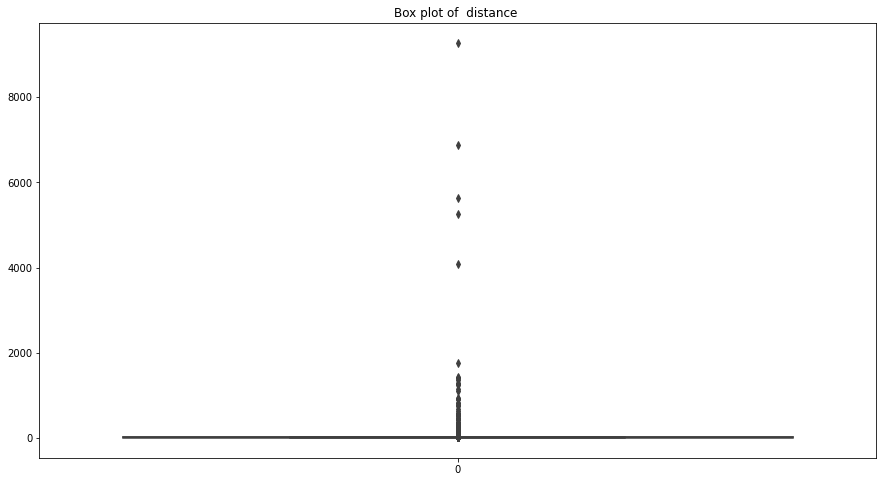

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df_new['speed'], orient="v")

Now let's remove the outliers based on speed

In [72]:
df['speed'].describe()

count    1.333910e+06
mean     8.534848e+00
std      4.452666e+00
min      1.665530e-05
25%      5.555519e+00
50%      7.701833e+00
75%      1.059701e+01
max      5.760280e+02
Name: speed, dtype: float64

#Linear Regression

To perfroming linear regression we knoe there are assumptions. Given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

***So keeping that in mind let's do our linear regression task. Firstly we will check the linear relationship or our dependent(trip_duration_hours) and independent variables***

In [73]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hour,speed,log_distance,log_trip_duration
vendor_id,1.000000,0.280889,0.004012,0.010263,-0.004124,0.008342,0.022144,-0.012039,0.022144,-0.004367,-0.002713,0.003209
passenger_count,0.280889,1.000000,-0.028387,-0.002807,-0.032396,0.002610,-0.009943,-0.044707,-0.009943,-0.027696,-0.024518,-0.013859
pickup_longitude,0.004012,-0.028387,1.000000,0.594088,0.292963,0.277891,0.000509,0.149670,0.000509,0.141949,0.077024,0.001227
pickup_latitude,0.010263,-0.002807,0.594088,1.000000,0.259512,0.512300,-0.012843,-0.060236,-0.012843,0.035196,-0.057500,-0.089925
dropoff_longitude,-0.004124,-0.032396,0.292963,0.259512,1.000000,0.483422,0.009150,0.256882,0.009150,0.218729,0.175440,0.059087
dropoff_latitude,0.008342,0.002610,0.277891,0.512300,0.483422,1.000000,-0.016757,-0.052777,-0.016757,0.093982,-0.046573,-0.109475
trip_duration,0.022144,-0.009943,0.000509,-0.012843,0.009150,-0.016757,1.000000,0.092142,1.000000,-0.067911,0.091896,0.305534
distance,-0.012039,-0.044707,0.149670,-0.060236,0.256882,-0.052777,0.092142,1.000000,0.092142,0.494438,0.845385,0.614004
trip_duration_hour,0.022144,-0.009943,0.000509,-0.012843,0.009150,-0.016757,1.000000,0.092142,1.000000,-0.067911,0.091896,0.305534
speed,-0.004367,-0.027696,0.141949,0.035196,0.218729,0.093982,-0.067911,0.494438,-0.067911,1.000000,0.435492,-0.183561


In [ ]:
# One-hot encoding
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])